---
# ทดลองทำ Classification กับชุดข้อมูล MNIST

---

จาก Library sklearn (หรือ scikit learn) เราจะเรียกใช้ datasets

*   นำเข้าข้อมูล (Load Dataset) : ในที่นี้ใช้ข้อมูล "Load_digits" ที่มีอยู่ใน sklearn

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

ทำการเก็บข้อมูล Features ต่าง ๆ ไว้ที่ตัวแปร X .. และ เก็บข้อมูล Target ไว้ที่ตัวแปร y

In [2]:
X = digits.data
y = digits.target

# print (digits.feature_names)
print (digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


แสดงตัวอย่างรูปภาพ ที่เก็บในตัวแปร X[0]

In [3]:
print (X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


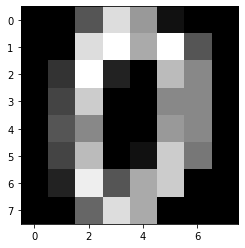

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.reshape(X[0], (8,8)), cmap=plt.cm.gray)
plt.show()

แสดงผลข้อมูล ในหมวดหมู่ (ตัวเลข) ที่ต่าง ๆ กัน

In [5]:
import matplotlib.pyplot as plt
import numpy as np

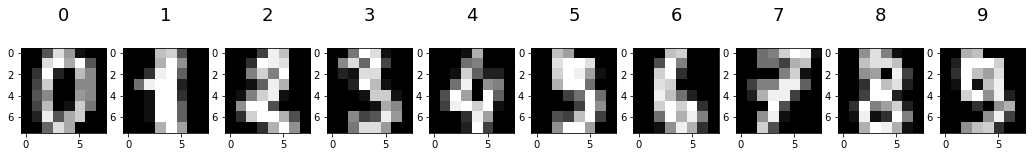

In [6]:
plt.figure(figsize=(18,8))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 18)

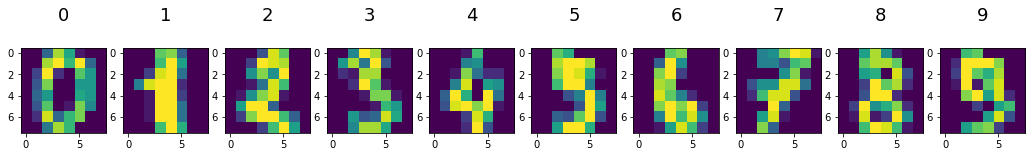

In [7]:
plt.figure(figsize=(18,8))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.viridis)
    plt.title('%i\n' % label, fontsize = 18)


---
เริ่มขั้นตอนการสร้าง (Train) / ทดสอบ (Test) Model


---

จาก Library sklearn

* เรียกใช้งาน Logistic Regression (Algorithm สำหรับการ Classification) ซึ่งอยู่ใน Linear Model
* เรียกใช้งาน train / test split (การแบ่งข้อมูล train / test) ซึ่งอยู่ใน model selection

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

* ทำการแบ่งข้อมูล train (ใช้สร้าง Model) / test (ใช้ทดสอบ Model)
* สามารถกำหนด test size ได้ (ค่า test_size = 0.25 หมายถึง 25% เป็นข้อมูล test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

* เพื่อดูขนาดของข้อมูล train และ ข้อมูล test

In [10]:
print (X_train.shape)
print (X_test.shape)

(1347, 64)
(450, 64)


# กำหนด Logistic Regression Model ในชื่อตัวแปร "LogReg" 
* ทำการ Train model ด้วยข้อมูล X_train, y_train

In [11]:
LogReg = LogisticRegression()

In [12]:
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# วัดประสิทธิภาพของ Model โดยใช้ข้อมูล X_test, y_test ..

* พิจารณาจากค่า Accuracy 

In [13]:
y_pred = LogReg.predict(X_test) 

In [14]:
score = LogReg.score(X_test, y_test)
score = round(score*100, 2)
print('Accuracy =', score)

Accuracy = 95.11


* พิจารณาจากค่า Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

In [16]:
import seaborn as sns

In [17]:
cm = confusion_matrix(y_test, y_pred)

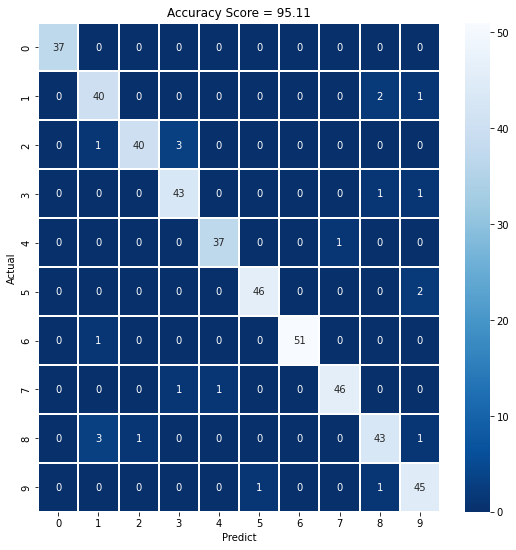

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predict');
figure_title = 'Accuracy Score = {0}'.format(score)
plt.title(figure_title, size = 12);

---
# จบแล้ว
---

---
# Challenge 02
---

 # กำหนด SVM Model ในชื่อตัวแปร "SVM_Classifier" 
* เรียกใช้ SVM จาก Sklearn
* ใช้ค่า Gamma = 0.001
* ทำการ Train model ด้วยข้อมูล X_train, y_train

In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split

classifier = svm.SVC(gamma=0.001)

In [26]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

# print (digits.feature_names)
print (digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
SVM_Classifier = svm.SVC(gamma=0.001)
SVM_Classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:

y_pred = SVM_Classifier.predict(X_test) 
score = SVM_Classifier.score(X_test, y_test)
score = round(score*100, 2)
print('Accuracy =', score)
confusion_matrix(y_test, y_pred)

Accuracy = 99.81


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 66,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 58]])

# **แผนผัง**

In [29]:
import matplotlib.pyplot as plt

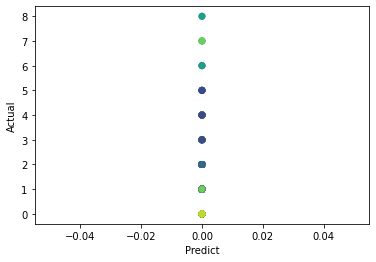

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)
plt.ylabel('Actual');
plt.xlabel('Predict');
plt.show()

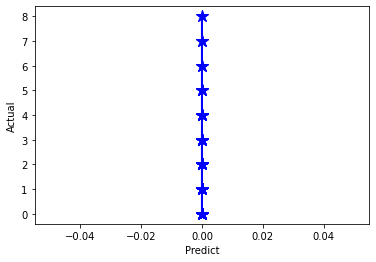

In [45]:
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM Classifier
svm = SVC(gamma=0.001)
svm.fit(X_train, y_train)


plt.plot(X[:, 0], X[:, 1],  'b-*', linewidth=2, markersize=12)
plt.ylabel('Actual');
plt.xlabel('Predict');
plt.show()

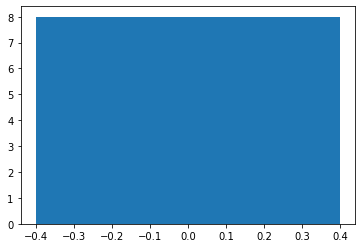

In [50]:
plt.bar(X[:, 0], X[:, 1])
plt.show()

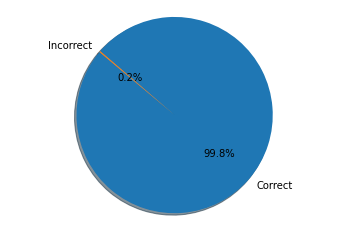

In [54]:
# Count the number of correct predictions
correct = np.sum(y_pred == y_test)

# Calculate the accuracy of the model
accuracy = correct / len(y_test)


# Plot the distribution of predictions as a pie chart
labels = ['Correct', 'Incorrect']
sizes = [correct, len(y_test) - correct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

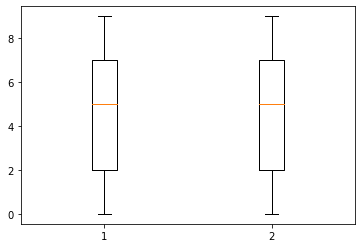

In [55]:
# เรียกใช้ Libraries Seaborn
import seaborn as sns

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Count the number of correct predictions
correct = np.sum(y_pred == y_test)

# Calculate the accuracy of the model
accuracy = correct / len(y_test)

# Plot the distribution of predictions as a box plot
data = [y_pred, y_test]
plt.boxplot(data)
plt.show()

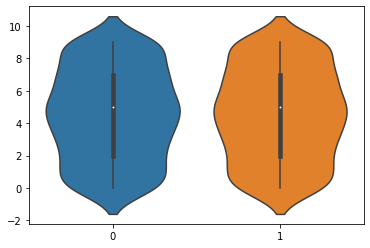

In [56]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

# Count the number of correct predictions
correct = np.sum(y_pred == y_test)

# Calculate the accuracy of the model
accuracy = correct / len(y_test)

# Plot the distribution of predictions as a violin plot
data = [y_pred, y_test]
sns.violinplot(data=data)
plt.show()